In [1]:
"""
2/18/23 - OBSOLETE - all moved to 230113_character_prims, which will be in ClustClass.

==================== OLD:

1/4/23 - I THINK THIS IS OLDER THAN 220113_analy_strokes_clustering_DS [YES DEFINITELY]

-----------------------------
[Older, for newer, see analy_spatial_220113. But this is still relevant, holding old code]
Clean versions for extracting, processing (including dim reduction) and plotting strokes.

Taking key pieces from strokemanifold, from:
- notebooks:
--- devo_strokemanifold_good_041221
--- devo_strokemanifold_analysis_040321
- codebase
--- analysis.strok.py
For how to, see evernote: ANALYSIS --> "Clustering Strokes"

Note that the old code was a mess. here trying to pull out just the key essentials.
Also improve it.
"""



'\n2/18/23 - OBSOLETE - all moved to 230113_character_prims, which will be in ClustClass.\n\n==================== OLD:\n\n1/4/23 - I THINK THIS IS OLDER THAN 220113_analy_strokes_clustering_DS [YES DEFINITELY]\n\n-----------------------------\n[Older, for newer, see analy_spatial_220113. But this is still relevant, holding old code]\nClean versions for extracting, processing (including dim reduction) and plotting strokes.\n\nTaking key pieces from strokemanifold, from:\n- notebooks:\n--- devo_strokemanifold_good_041221\n--- devo_strokemanifold_analysis_040321\n- codebase\n--- analysis.strok.py\nFor how to, see evernote: ANALYSIS --> "Clustering Strokes"\n\nNote that the old code was a mess. here trying to pull out just the key essentials.\nAlso improve it.\n'

In [6]:
from pythonlib.dataset.dataset_preprocess.general import preprocessDat
from pythonlib.dataset.dataset import Dataset
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import pickle


In [ ]:
a = "Pancho"
e = "concretechunk1"
r = "baseline"

D = Dataset([])
D.load_dataset_helper(a, e, rule=r)
D.load_tasks_helper()

In [ ]:
D = preprocessDat(D, e)[0]

In [ ]:
# Pull out a single good day
date_good = "220401"
D = D.filterPandas({"date":[date_good]}, return_ver="dataset")


In [ ]:
D.Dat

## 1. Extract beh strokes

In [ ]:
D.plotOverview()

In [ ]:
strokes_ver_list = ["strokes_beh_splines"]
for sver in strokes_ver_list:
    # Extract single strokes feat 
    D.sf_extract_and_save(strokes_ver = sver)


##### Load presaved extract sf dataset

In [ ]:
D.sf_load_preextracted([sver])

## Cluster strokes by stimilarity (using Dave Mets method)


See devo_strokemanifold_good_041221


If want to get embeddings across datsaets/animals:

In [ ]:
DEBUG = False
import os
strokes_ver_list = [sver]

In [ ]:
list_rule = ["baseline", "lolli"]

# Run analysis for all single and combined datasets
for animallist in animallist_list:
    for strokes_ver_list in strokesverlist_list:
        if "Pancho" in animallist and "Red" in animallist:
            # then skip some things.
#             if len(strokes_ver_list)==1 and "strokes_parse" in strokes_ver_list:
#                 continue
            if len(strokes_ver_list)==1:
                continue
            # FILL IN HERE

Use the following if want to load a single SF spanning multiple dataset.
This allows getting an embedding of combined data

In [ ]:
### FINAL LOAD BEFORE GET EMBEDDINGS
animallist = ["Pancho"]
expt = "concretechunk1"
list_rule = ["baseline"]
D = Dataset([])
D.load_dataset_helper(animallist, expt, "mult", rule=list_rule)
D.sf_load_combined_sf(animallist, [expt], strokes_ver_list)

To get embeddings within a single dataset

In [ ]:
### now load multiple datasets, and concat SF, preprocess and save
D.sf_load_preextracted(strokes_ver_list=strokes_ver_list)

if DEBUG:
    D.SF = D.SF[:100]

# preprocess SF
D.sf_preprocess_stroks()
D.sf_save_combined_sf()

In [ ]:
## Cluster strokes 

In [ ]:
gmm_n_mixtures = [8,10,12,14]
perplist = [35]

import os
# Load SFs, and perform embeddings and clustering
if DEBUG:
    similarity_matrix, idxs_stroklist_basis, params = D.sf_embedding_bysimilarity(Nbasis=5)
else:
    similarity_matrix, idxs_stroklist_basis, params = D.sf_embedding_bysimilarity()

In [ ]:
gmm_n_mixtures = [8,10,12,14]
perplist = [35]

### MODEL the sim matrix
from pythonlib.tools.clustertools import clusterSimMatrix

if DEBUG:
    DAT = clusterSimMatrix(similarity_matrix, gmm_n_mixtures=[4], perplist = [35])
else:
    DAT = clusterSimMatrix(similarity_matrix, gmm_n_mixtures=gmm_n_mixtures, perplist=perplist)

# Save clustering results

s = params["path_embeddings_similarity"]
sdir = f"{s}/clustering"
os.makedirs(sdir, exist_ok=True)

path = f"{sdir}/DAT.pkl"
with open(path, "wb") as f:
    pickle.dump(DAT, f)
print(path)

## PLOT results of clustering analyssi

- plots: NOT YET DONE
	- see the notebook: devo_strokemanifold_analysis_040321 for latest plots. Need to modify these

OLD VERSION:
- ALL plotting code. Have not updated plotting code for new version
- path: analysis/database/clustering...

TODO:
- devo_strokemanifold_analysis_040321., see the bottom. make all those plots, using the new data format 
- Start a new thing in database


DO THIS:
- see devo_strokemanifold_analysis_040321
- the section "##### 1) load preextracted data (extraction in devo_strokemanifold_good_041221)"

##### Copied from devo_strokemanifold_good_041221
Note sure what this does

In [ ]:
from pythonlib.tools.clustertools import *


In [ ]:
# Load data (dataset + SF)
animallist = ["Pancho"]
strokes_ver_list = ["strokes_beh_splines", "strokes_parse"]

D = Dataset([])
D.load_dataset_helper(animallist, expt, "mult")
D.sf_load_combined_sf(animallist, [expt], strokes_ver_list)


# Load clustering data
D.SFparams["path_sf_combined"]


pathlist = findPath(D.SFparams["path_sf_combined"], 
         [["embeddings"], ["similarity", "stretch_to_1", "euclidian_diffs"]], "", "", True)

if len(pathlist)>1:
    assert False
    
pathdat = f"{pathlist[0]}/dat.pkl"
with open(pathdat, "rb") as f:
    dat = pickle.load(f)
    
pathdat = f"{pathlist[0]}/params.pkl"
with open(pathdat, "rb") as f:
    params = pickle.load(f)


params["path_embeddings_similarity"]

##### Plots copied from devo_strokemanifold_analysis_040321
From the section "GOOD - load coimbined data (single dataset, already done combinngi)"

In [7]:
# pathdir = "/data2/analyses/database/combined_strokfeats/Pancho-gridlinecircle-strokes_beh_splines-210923_210307/embeddings/similarity-stretch_to_1-euclidian_diffs-N5-210923_210307/"
pathdir_sf = "/data2/analyses/database/combined_strokfeats/Pancho-concretechunk1-strokes_beh_splines-220406_122024"
pathdir_clust = "/data2/analyses/database/combined_strokfeats/Pancho-concretechunk1-strokes_beh_splines-220406_122024/embeddings/similarity-stretch_to_1-euclidian_diffs-N300-220406_182856"

In [8]:
print(pathdir_clust)

path_clust = f"{pathdir_clust}/clustering/DAT.pkl"
path_sim = f"{pathdir_clust}/dat.pkl"

with open(path_clust, "rb") as f:
    dat_clust = pickle.load(f)
    
with open(path_sim, "rb") as f:
    sim_mat = pickle.load(f)
    
with open(f"{pathdir_clust}/params.pkl", "rb") as f:
    params = pickle.load(f)

path_sf = f"{pathdir_sf}/SF.pkl"
with open(path_sf, "rb") as f:
    SF = pickle.load(f)
    
print("* dat_clust:", dat_clust.keys())
print("* params:", params)
print("* SF", SF.keys())

/data2/analyses/database/combined_strokfeats/Pancho-concretechunk1-strokes_beh_splines-220406_122024/embeddings/similarity-stretch_to_1-euclidian_diffs-N300-220406_182856
* dat_clust: dict_keys(['pca_model', 'Xpca', 'models_tsne', 'models_gmm', 'similarity_matrix', 'gmm_n_mixtures', 'perplist', 'gmm_covariance_type'])
* params: {'rescale_strokes_ver': 'stretch_to_1', 'distancever': 'euclidian_diffs', 'npts_space': 50, 'Nbasis': 300, 'idxs_stroklist_basis': [16, 5003, 3113, 907, 8861, 10947, 13046, 13543, 7767, 8676, 883, 454, 8168, 909, 4955, 10493, 1375, 2607, 6790, 3977, 1621, 6959, 7065, 8385, 231, 10470, 9777, 4350, 1421, 3670, 9487, 10988, 12484, 5956, 11055, 12913, 52, 9520, 5535, 6130, 11477, 11792, 11458, 7442, 9685, 9475, 1804, 1765, 8876, 475, 1186, 11943, 6829, 8601, 7602, 8428, 8657, 7028, 3257, 13122, 8401, 13465, 7121, 54, 974, 2204, 7306, 3462, 12009, 3486, 6867, 5883, 5783, 1626, 5218, 1504, 5134, 12046, 4743, 3376, 1809, 7818, 11041, 4875, 850, 6365, 3656, 13266, 8828,

In [9]:
# sanity checks
assert dat_clust["Xpca"].shape[0] == sim_mat["similarity_matrix"].shape[0]
assert dat_clust["Xpca"].shape[0] == SF.shape[0]

In [ ]:
from pythonlib.tools.expttools import findPath
from pythonlib.tools.pandastools import applyFunctionToAllRows

# TODO: Fill this column with whether is parse"
if True:
    def F(x):
        return False
    SF = applyFunctionToAllRows(SF, F, newcolname="is_parse")


# Dataset codes - have a field <animal>_<isparse>
def F(x):
    if x["is_parse"]:
        tmp = "parse"
    else:
        tmp = "beh"        
    return f"{x['animal']}_{tmp}"
SF = applyFunctionToAllRows(SF, F, newcolname="animal_dset")


# Summarize assignment to datasets. make sure it is staircase like
plt.figure()
plt.plot(SF["animal_dset"])
print("Dataset -- Trial count")
SF["animal_dset"].value_counts()

# == filtering SF to get only same tasks
from analysis.strok import prepSF, get_SF_shared_tasks

# get common tasks.
SF_sharedtasks = get_SF_shared_tasks(SF)

# == plot example trials

# 1) Go back and reload dataset




In [ ]:
if False:
    # Not coded
    # get common tasks.
    def get_SF_shared_tasks(SF, col_to_equalize_over="animal_dset"):
        """ 
        only uses tasks present for all dasets, and subsamples so
        exact same num rows for each dataset (for a task).
        RETURNS:
        """

        print("TODO, NOTE: shouuld instead match num trials, but havent coded")

        # 1) Get dict of shared tasks, and num trials
        trials_per_task = get_shared_tasks(SF, col_to_equalize_over=col_to_equalize_over)

        # 2) Subsample SF to get matched datseets.
        ndatasets = len(SF[col_to_equalize_over].unique())
        df_all = []
        for task, n in trials_per_task.items():
            def F(x):
                inds = random.sample(range(len(x)), n)
                return x.iloc[inds]

            # 1) get just for this task
            SFthis = SF[SF["unique_task_name"]==task]

            # extract n rows for each daset
            dfthis = SFthis.groupby(col_to_equalize_over).apply(F).reset_index(drop=True)
            assert len(dfthis)==n*ndatasets, "not sure why.."
            df_all.append(dfthis)

        SF_sharedtasks = pd.concat(df_all).reset_index(drop=True)

        print("New len of SF after matching tasks and num trials exactly:")
        print(len(SF_sharedtasks))

        return SF_sharedtasks


    SF_sharedtasks = get_SF_shared_tasks(SF)
else:
    SF_sharedtasks = SF

In [ ]:
# == plot example trials

# 1) Go back and reload dataset

##### Functions to manipulate/extract data

In [112]:

# def extract_dat(kind, params):
#     """ Extract data (ntrials x ndim) in different 
#     potential represntations
#     """

#     def extract_tsne_dat_(perp):
#         """
#         RETURN:
#         - data in tsne space, ndat x ndim
#         """

#         for mod in dat_clust["models_tsne"]:
#             if mod["perp"]==perp:
#                 return mod["D_fit"]

#         print(dat_clust["models_tsne"])
#         assert False, "model with this perp doesnt exist"
    
#     if kind=="tsne":
#         # takes first 2 dim on tsne
#         perp = params[0]
#         X = extract_tsne_dat_(perp)
#     elif kind=="pca":
#         # Takes first 2 dim of pca
#         X= dat_clust["Xpca"]
#     elif kind=="simmat":
#         X = sim_mat["similarity_matrix"]
#     else:
#         assert False        
        
#     return X
    
# def extract_model(kind, params):
#     """ Extract a model, helper code
#     PARAMS:
#     - kind, string name, which model
#     - params, list of params
#     """
    
#     def extract_gmm_model_(nmix):
#         """
#         RETURN:
#         - mod, dict holding model information
#         """

#         for mod in dat_clust["models_gmm"]:
#             if mod["n"]==nmix:
#                 return mod
#         print(dat_clust["models_gmm"])
#         assert False, "model with this nmix doesnt exist"

#     if kind=="gmm":
#         nmix = params[0] # n mixtgures
#         mod = extract_gmm_model(nmix)["mod"]
#     elif kind=="pca":
#         assert False, "code it"
# #     elif kind=="tsne":
# #         dat_clust["models_tsne"]
#         assert False, "code it"
#     return mod
    
# def gmm_extract_labels(gmm_n):
#     """
#     """
#     mod = extract_gmm_model(gmm_n)
#     Xpca = dat_clust["Xpca"]
#     labels = mod["mod"].predict(Xpca)
#     return labels


# from pythonlib.tools.plottools import plotScatterOverlay
# def extractX(SF, ver="tsne"):
#     """ from SF, pull out array size N x d
#     INPUT:
#     ver, {"tsne", "pca", "sim"}
#     RETURN:
#     array
#     """

#     if ver=="tsne":
#         key = "Xtsne"
#     elif ver=="pca":
#         key="Xpca"
#     elif ver=="sim":
#         key="Xsim"

# #     return np.stack(SF[key].values)

# def extract_labels(kind, params):
#     """ General purpose to extract labele,s which is
#     list of categories, lenght of datset, useful for
#     plotting
#     PARAMS;
#     - kind, which labels?
#     - params, list holding params for this kind.
#     """
    
#     if kind=="gmm":
#         # gmm mixture categories
#         nmix = params[0] # num mixture componets, to pick out model.
#         labels = gmm_extract_labels(nmix)
#     elif kind=="random":
#         # Generate random labels (ints, from 0,....)
#         n = params[0] # range of numbers
#         labels = [random.sample(range(n), 1)[0] for _ in range(len(SF))]
#     else:
#         assert False
#     return labels

# labels = extract_labels("gmm", [10])



##### Plotting

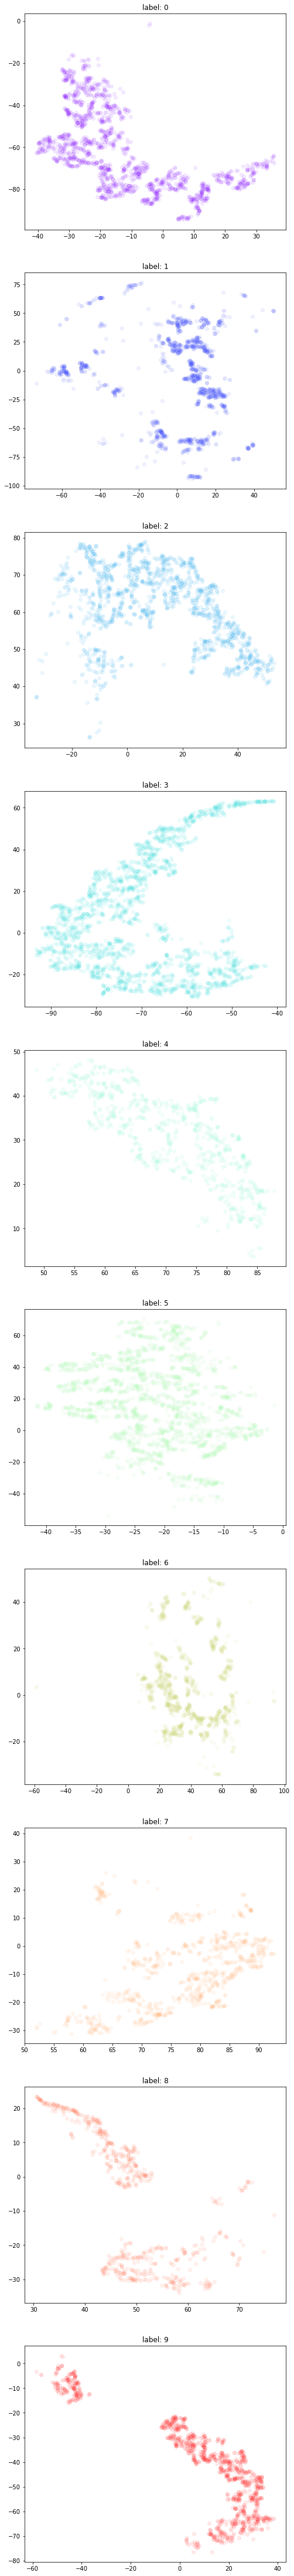

In [79]:
import random
from pythonlib.drawmodel.strokePlots import plotStroksInGrid
def plotStrokOrderedByLabel(labels, SF, labels_in_order=None):
    """ plot example (rows) of each label(cols), ordred as in 
    labels_in_order.
    INPUTS:
    - labels_in_order, if None, then will use sorted(set(labels))
    - labels, list, same len as SF
    """
    assert False, 'see DS'

    # === for each cluster, plot examples
    if labels_in_order is None:
        labels_in_order = sorted(list(set(labels)))

    indsplot =[]
    titles=[]
    for ii in range(3):
        # collect inds
        for lab in labels_in_order:
            inds = [i for i, l in enumerate(labels) if l==lab]
            indsplot.append(random.sample(inds, 1)[0])
            if ii==0:
                titles.append(lab)
            else:
                titles.append('')

    # plot    
    stroklist = [SF["strok"].values[i] for i in indsplot]
    fig = plotStroksInGrid(stroklist, ncols=len(labels_in_order), titlelist=titles);

# # Plot example trials, in grid organized by TSne
# def plot_grid_egtrials_organizedby(by, params, nbins=20):
#     """ Plot strokes in a 2d grid, where x and y coord of each subplot
#     correspond to binne coordinates in some low d representation
#     PARAMS:
#     - by, string name, what coordinate system
#     - params, list, params that are for this "by"
#     - nbins, int, how many bins per axis. 
#     """
#     from pythonlib.drawmodel.strokePlots import plotDatStrokes

#     # Which coordinate system for deciding 2d grid organization
#     Xfit = extract_dat(by, params)

#     # === plot a grid, based on percentiles along 2 dimensions
#     # 1) assign all indices to a position in grid, based on percentiles
#     values1 = Xfit[:,0]
#     values2 = Xfit[:,1]
#     idxslist = range(Xfit.shape[0])
#     p = np.linspace(0, 100, nbins)

#     binedges = np.percentile(values1, p)
#     inds1 = np.digitize(values1, binedges)

#     binedges = np.percentile(values2, p)
#     inds2 = np.digitize(values2, binedges)

#     # 2) for each combo of inds, plot an example trial
#     indslist = set(np.r_[inds1, inds2])
#     fig, axes = plt.subplots(len(indslist), len(indslist), sharex=True, sharey=True, figsize=(len(indslist)*2, len(indslist)*2))
#     for i1 in indslist:
#         for ii2, i2 in enumerate(np.array([i for i in indslist])[::-1]): # so can go backwards.. with bottom left as 1,1
#             print(i1, i2)
#             ax = axes[ii2-1][i1-1]
#             indsthis = list(np.where((inds1==i1) & (inds2==i2))[0])
#             if len(indsthis)==0:
#                 continue

#             ind = random.sample(indsthis,1)[0]

#             strokthis = SF["strok"][ind]
#             plotDatStrokes([strokthis], ax, pcol="r")
#             ax.axhline(0, color='k', alpha=0.3)
#             ax.axvline(0, color='k', alpha=0.3)
#             ax.set_title(f"{i1}-{i2}")
#             M = 300
#             ax.set_xlim([-M, M])
#             ax.set_ylim([-M, M])    
#         assert False

# #     fig.savefig(f"{SDIRFIGS}/tsne-behgrid-ll.pdf")

def plotScatter(X, SF, dims_to_take, nplot = 20, ax=None, 
                       color="k", textcolor="r", alpha=0.05):
    """ 
    Scatter plot of X, picking out 2 dimensions. useful is X is output after
    dim reduction. 
    INPUT:
    - X, array, shape N x D, where N is n samp, D is dim.
    - dims_to_take, list, which 2 dims to take, e.g., [0, 1]
    """
    from pythonlib.tools.linalgtools import plotScatterXreduced
    
    fig, ax, indsrand = plotScatterXreduced(X, dims_to_take, nplot, ax, color, textcolor, alpha, return_inds_text=True)
    
    # === plot each of these cases
    if SF is not None:
        strokstoplot = [SF["strok"][i] for i in indsrand]
        titlelist = [f"{i}" for i in indsrand]
        plotStroksInGrid(strokstoplot, titlelist=titlelist);

    return fig, ax


from pythonlib.tools.plottools import plotScatterOverlay

def plotScatterOverlayThis(datkind, datparams, labelkind, labelparams):
    """ General function for plotting scatter plot (each dot single stroke)
    in any coordinate systmea dn coloring with any labels
    PARAMS:
    - datkind, string name of which coordinate system
    - datparams, list, goes with datkind
    - labelkind, string name of how to label (how to color)
    - labelparams, list holding params.
    NOTE: replaces plotTsneSeparateLabels
    """
    
    X = extract_dat(datkind, datparams)
    labels = extract_labels(labelkind, labelparams)
    
    # overlay, separate
    fig, ax = plotScatterOverlay(Xtsne, labels, 
        ver="separate_no_background", alpha=0.08, downsample_auto=True)

plotScatterOverlayThis("tsne", [35], "gmm", [10])
    

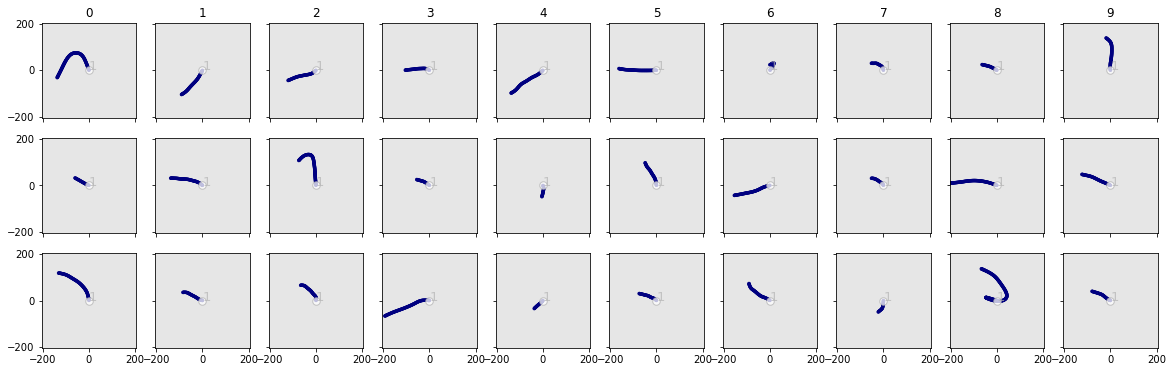

In [101]:

def plot_examples_grouped_by_label(labelkind, labelparams=[], nplot=10):
    """ Plot example trials, each as a subplot grouped toegherther by 
    label.
    PARAMS:
    - labelkind, what label to use
    - labelparams, params go with label
    - nplot, n examples per label
    """
    assert False, "see DS.plot_egstrokes_grouped_in_subplots"

    labels = extract_labels(labelkind, labelparams)
    labellist = set(labels)
                    
    # === for each cluster, plot examples
    for lab in labellist:
        inds = [i for i, l in enumerate(labels) if l==lab]

        indsplot = random.sample(inds, nplot)

        stroklist = [SF["strok"].values[i] for i in indsplot]
        fig = plotStroksInGrid(stroklist, titlelist=indsplot)
#         fig.savefig(f"{SDIRFIGS}/gmmlabels-examplebeh-{lab}.pdf")

# plot_examples_grouped_by_label("gmm", [10])
plot_examples_grouped_by_label_columns("gmm", [10])

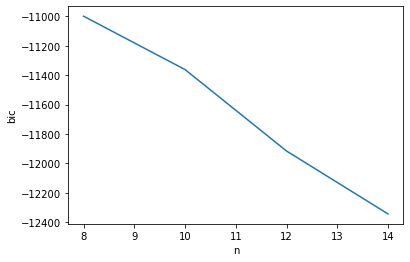

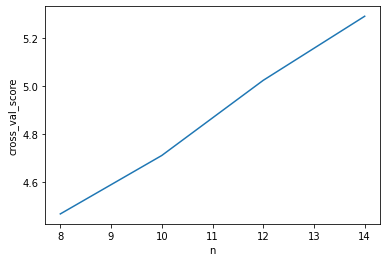

In [83]:
# Plots of gmm

# Plotting for GMM results
dfthis = pd.DataFrame(dat_clust["models_gmm"])

plt.figure()
fig = sns.lineplot(x="n", y="bic", data=dfthis).get_figure()
# fig.savefig(f"{SDIRFIGS}/gmm-bic.pdf")

plt.figure()
fig = sns.lineplot(x="n", y="cross_val_score", data=dfthis).get_figure()
# fig.savefig(f"{SDIRFIGS}/gmm-ll.pdf")


/home/lucast4/miniconda3/envs/drag2_matlab/lib/python3.7/site-packages/numpy/lib/histograms.py:905: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


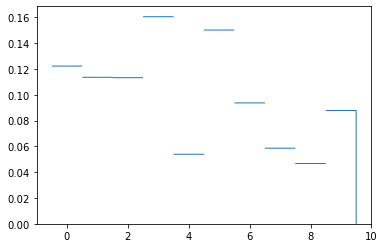

In [100]:
labellist = list(set(labels))
binedges = np.r_[list(labels), list(labels)[-1]+1]-0.5

#     xy = plt.hist(labelthis, bins=binedges, density=True, histtype="step")
#         xy = np.histogram(labelthis, bins=binedges, density=True)
xy = plt.hist(labels, bins=binedges, density=True, histtype="step")


In [ ]:
# === plot frac strokes within each category
if True:
    # y = []
    # for l in labellist:
    #     y.append(len([lab for lab in labels if lab == l]))


    epochs = set(list(SF["expt-epoch"].values))
    fig = plt.figure(figsize=(10,5))
    for e in epochs:
        inds = np.where(SF["expt-epoch"].values==e)[0]
        labelthis = [labels[i] for i in inds]

        binedges = np.r_[list(labellist), list(labellist)[-1]+1]-0.5
        xy = plt.hist(labelthis, bins=binedges, density=True, histtype="step")
    #     plt.plot(binedges[:-1]+0.5, xy[0])
    plt.legend(epochs)
    fig.savefig(f"{SDIRFIGS}/gmmlab-hist-bars.pdf")

    # Tighter restriction - only test
    epochs = set(list(SF["expt-epoch"].values))
    fig = plt.figure(figsize=(10,5))
    for e in epochs:

        inds = np.where(
            (SF["expt-epoch"].values==e) & (SF["traintest"].values=="test") & np.isin(SF["task_stagecategory"], ["2linePlusL", "3linePlusL", "LplusL", "linePlusLv2"])
        )[0]

        labelthis = [labels[i] for i in inds]

        binedges = np.r_[list(labellist), list(labellist)[-1]+1]-0.5
    #     xy = plt.hist(labelthis, bins=binedges, density=True, histtype="step")
#         xy = np.histogram(labelthis, bins=binedges, density=True)
        xy = plt.hist(labelthis, bins=binedges, density=True, histtype="step")
    plt.legend(epochs)
    fig.savefig(f"{SDIRFIGS}/gmmlab-hist-bars-onlytest-onlylines5tasks.pdf")



##### Plots to make

In [63]:
# === VISUALIZE CLUSTERS
# for each cluster, plot examples at different extremes (and also centroid).
nmix = 10

mod = extract_model(kind="gmm", params=[nmix])
fig = plt.figure(figsize=(5, 10))
labelsprob = mod.predict_proba(Xpca)
plt.imshow(labelsprob[2::500], vmin=0., vmax=1.)
plt.colorbar()
plt.xlabel('gmm label')
plt.ylabel('trial')
fig.savefig(f"{SDIRFIGS}/gmmlabels-heat-examplescores.pdf")

AttributeError: 'dict' object has no attribute 'predict_proba'

<Figure size 360x720 with 0 Axes>

In [ ]:
    # === bootstrap to get category membership
    binedges = np.r_[list(labellist), list(labellist)[-1]+1]-0.5
    Nboot = 100
    only_lines5_tests = False # then restricts to common tasks
    only_tests = True # overwrite above
    result_boot =[]
    for e in epochs:

        if only_tests:
            inds = np.where(
                (SF["expt-epoch"].values==e) & (SF["traintest"].values=="test"))[0]
        elif only_lines5_tests:
            inds = np.where(
                (SF["expt-epoch"].values==e) & (SF["traintest"].values=="test") & np.isin(SF["task_stagecategory"], ["2linePlusL", "3linePlusL", "LplusL", "linePlusLv2"])
            )[0]
        else:
            inds = np.where(SF["expt-epoch"].values==e)[0]

        labelthis = [labels[i] for i in inds]

        valsboot = []
        K = len(labelthis)
        for n in range(Nboot):
            labelrand = random.choices(labelthis, k=K)

            #  get bin occupancies
            xy = np.histogram(labelrand, bins=binedges, density=True)
            valsboot.append(xy[0])

            for val, b in zip(xy[0], xy[1]):
                result_boot.append({
                    "epoch":e,
                    "nboot":n,
                    "bin":int(b+0.5),
                    "val":val})
    #     result_boot.append({
    #             "epoch":e,
    #             "valsboot":np.stack(valsboot)})




    df_boot = pd.DataFrame(result_boot)

    # sns.catplot(data=df_boot, x="bin", y="val", hue="epoch", kind="point", aspect = 2, linestyles="")
    fig = sns.catplot(data=df_boot, x="bin", y="val", hue="epoch", aspect = 2, alpha=0.4)
    fig.savefig(f"{SDIRFIGS}/gmmlab-hist-bootstrapped-onlytest-overlay.pdf")


    sns.catplot(data=df_boot, x="bin", y="val", hue="epoch", aspect = 2, row="epoch", alpha=0.4)
    fig.savefig(f"{SDIRFIGS}/gmmlab-hist-bootstrapped-onlytest-separate.pdf")



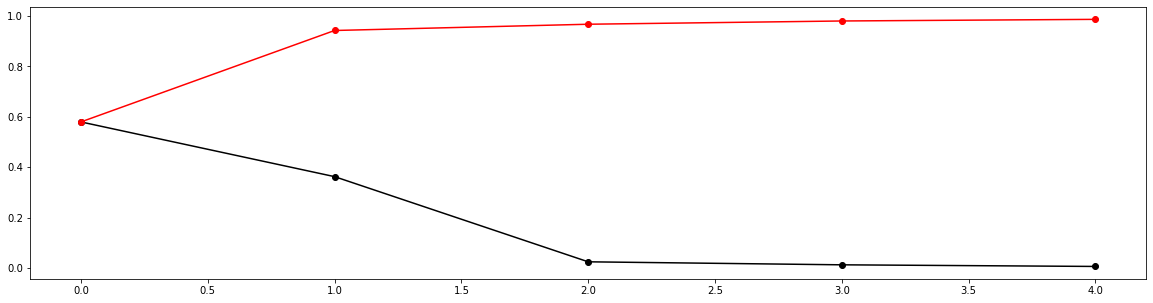

In [119]:
# === pca plot
pcamod = dat_clust["pca_model"]
fig = plt.figure(figsize=(20,5))
plt.plot(pcamod.explained_variance_ratio_, "ok-")
plt.plot(np.cumsum(pcamod.explained_variance_ratio_), "or-")

# fig.savefig(f"{SDIRFIGS}/pca_variance.pdf")


##### Plots to add

In [120]:
# ADD THIS - if multipel dataset
    # 1) overlay
    labels = list(SF["expt-epoch"].values)
    # labels = [0 for _ in range(len(Xtsne))]
    fig, ax = plotScatterOverlay(Xtsne, labels, ver="separate", alpha=0.04)
    fig.savefig(f"{SDIRFIGS}/tsne-scatter-epochs.pdf")

    # 1) overlay
    labels = list(SF["expt-epoch"].values)
    # labels = [0 for _ in range(len(Xtsne))]
    fig, ax = plotScatterOverlay(Xtsne, labels, ver="separate", alpha=0.04)
    fig.savefig(f"{SDIRFIGS}/tsne-scatter-epochs.pdf")

    # 2) same, but only test tasks
    indsplot = SF["traintest"].values=="test"
    labels = list(SF["expt-epoch"].values)
    labels = np.array(labels)[indsplot]
    Xthis = Xtsne[indsplot, :]
    fig, ax = plotScatterOverlay(Xthis, labels, ver="separate", alpha=0.1)
    fig.savefig(f"{SDIRFIGS}/tsne-scatter-epochs-testonly.pdf")


IndentationError: unexpected indent (12302261.py, line 3)

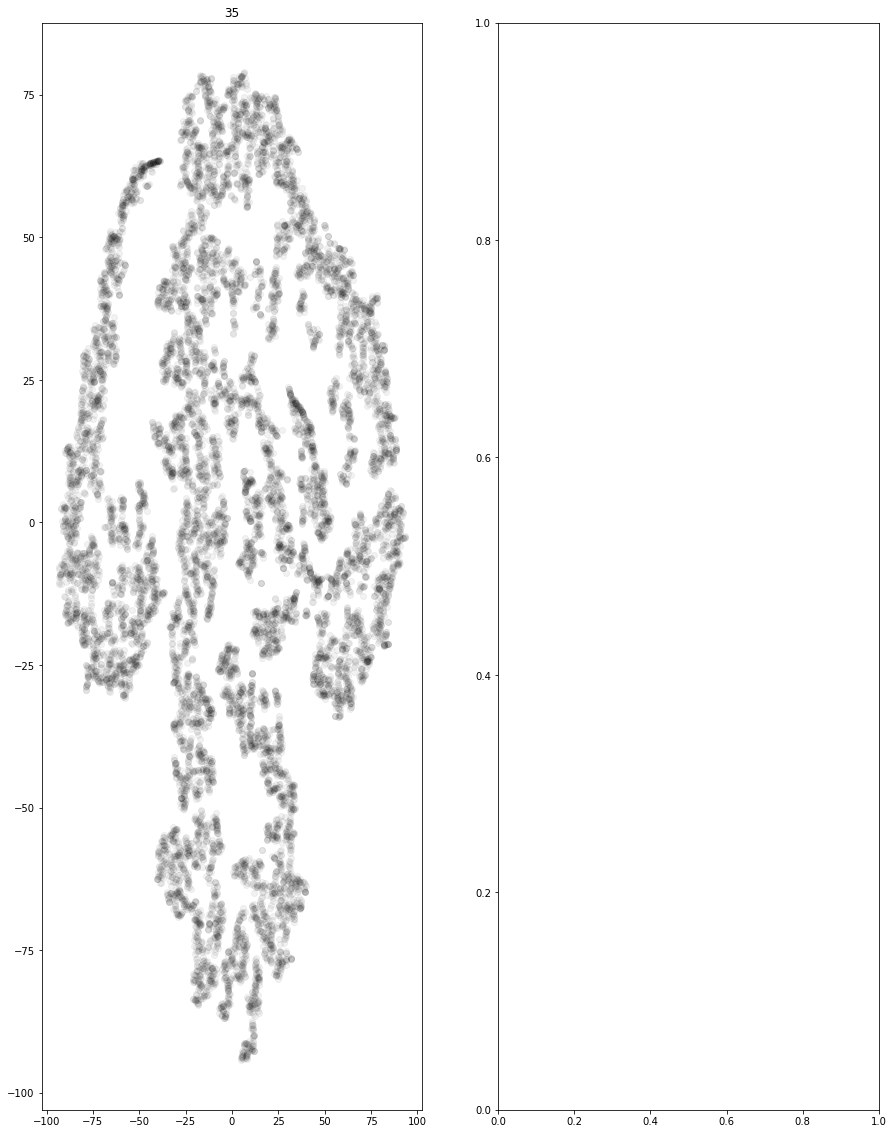

In [41]:
models_tsne = dat_clust["models_tsne"]

nrows = int(np.ceil(len(models_tsne)/2))
fig, axes = plt.subplots(nrows, 2, figsize=(15, 20))

for mod, ax in zip(models_tsne, axes.flatten()):
    Xtsne = mod["D_fit"]
    perp = mod["perp"]
    # print(SAVEDAT["tsne_models"])
    # Xtsne = out[0]["D_fit"]
    # Plot TSNE RESULTS
#     labels = [0 for _ in range(len(Xtsne))]
    plotScatter(Xtsne, None, [0,1], ax=ax)
    ax.set_title(perp)
#     plotScatterOverlay(Xtsne, labels)
    # plt.title(

# fig.savefig(f"{SDIRFIGS}/tsne-scatter-diffperplexities.pdf")


In [ ]:
def plotTsneSeparateLabelsHeatmap(SF, nbins = 40):
    """ heatmaps in tsne space, for all datasets split, and
    also comparing datsets
    """
    from pythonlib.tools.plottools import getHistBinEdges

    Xtsne = extractX(SF, "tsne")
    bins = [getHistBinEdges(Xtsne[:,0], nbins), getHistBinEdges(Xtsne[:,1], nbins)]

    nrows = 2
    ncols = 2
    fig, axes = plt.subplots(nrows, ncols, sharex=True, sharey=True, figsize=(15,15))

    # == get vmin and vmax across figures
    h_all =[]
    for dset in set(SF["animal_dset"]):
        SFthis = SF[SF["animal_dset"]==dset]
        X = extractX(SFthis, "tsne")
        h = np.histogram2d(X[:,0], X[:,1], bins=bins, density=True)[0]
        h_all.append(h)
    vmin = np.min(np.concatenate([h[:] for h in h_all]))
    vmax = np.max(np.concatenate([h[:] for h in h_all]))

    # == plot, using common vmin and vmax
    for dset, ax in zip(set(SF["animal_dset"]), axes.flatten()):
        SFthis = SF[SF["animal_dset"]==dset]
        X = extractX(SFthis, "tsne")
        h = ax.hist2d(X[:,0], X[:,1], bins=bins, density=True, vmin=vmin, vmax=vmax, cmap="plasma");
        h_all.append(h[0][:])
        ax.set_title(dset)
        
    # == plot differences
    diffs_to_plot = [
        [0,1],
        [2,3],
        [0,2],
        [1,3],
    ]
    for d in diffs_to_plot:
        hthis = h_all[d[1]] - h_all[d[0]]
        
        v = np.max(np.abs(hthis[:]))
        
        plt.figure()
        plt.imshow(np.flipud(hthis.T), vmin=-v, vmax=v,  cmap="PuOr")
        plt.colorbar()
        plt.title(f"{d[1]} minus {d[0]}")
            
plotTsneSeparateLabelsHeatmap(SF, 40)

##### Additional things not added

In [ ]:
def gmm_labels(SAVEDAT, gmm_n, SF, assign_as_column_in_SF=True):
    """
    - assign_as_column_in_SF, then replaces column called "label"
    """
    mod = gmm_extract_model(SAVEDAT, gmm_n)

    # === remap labels, sorted by order of curvature
    Xpca = SAVEDAT["Xpca"]
    SF["label"] = mod.predict(Xpca)

    distances =[]
    labelsthis = []
    for group in SF.groupby(["label"]):

        distances.append(np.mean(group[1]["distance"]))
        labelsthis.append(np.mean(group[1]["label"].values[0]))

    tmp = [[l, d] for l, d in zip(labelsthis, distances)]

    tmp_sorted = sorted(tmp, key=lambda x: x[1])

    label_map = {int(lab[0]):i for i, lab in enumerate(tmp_sorted)}
    label_map # maps gmm output to new label name

    # === use new labels
    labels = mod.predict(Xpca)
    print(labels)
    labels = np.array([label_map[l] for l in labels])
    print(labels)
    labellist = list(set(labels))

    if assign_as_column_in_SF:
        SF["label"] = labels
    else:
        if "label" in SF:
            del SF["label"]
    
    return labels, SF


In [ ]:
# == plot
import seaborn as sns
# plt.figure(figsize=(15,5))
fig = sns.displot(data=SF, x="label_resorted",hue="animal_dset", stat="probability", multiple="dodge", 
                  element="bars", shrink=1, aspect=3, height=5)
fig.axes[0][0].set_xticks(range(len(diffs)))
fig.axes[0][0].set_xticklabels([d[0] for d in diffs])
# sns.histplot(data=SF, x="label", hue="animal_dset", stat="probability", multiple="dodge", element="bars", shrink=1.5)
fig = sns.displot(data=SF, x="label_resorted", row="animal_dset", stat="probability", multiple="dodge", element="bars", shrink=1, aspect=3, height=5)

# == plot example trials
ploStrokOrderedByLabel(SF["label"].values, SF, [d[0] for d in diffs])

In [ ]:
# one separate plot for each dataset, but coloring by label.
for dset in sorted(list(set(labels_dset))):
    inds = labels_dset == dset
    Xthis = Xtsne[inds]
    labels_this = labels_gmm[inds]
    fig, ax = plotScatterOverlay(Xthis, labels_this, ver="overlay", alpha=1)
    # fig.savefig(f"{SDIRFIGS}/tsne-scatter-epochs.pdf")
    fig.suptitle(dset)

In [ ]:
# Plot scatter, labeled by gmm.
labels = gmm_extract_labels(4)
# X = dat_clust["Xpca"]
X = extract_tsne_dat(35)
fig, ax = plotScatterOverlay(X, labels, ver="overlay", alpha=1)
# fig.savefig(f"{SDIRFIGS}/tsne-scatter-epochs.pdf")
# fig.suptitle(dset)

In [ ]:
# def plotHistOfLabels(labels):
#     """ Plot historgram of labels,
#     INPUT:
#     - labels, vector of labels, could be string or num, 
#     """

#     # get counts for each label
#     from pythonlib.tools.listtools import tabulate_list
#     tab = tabulate_list(labels, return_as_list=True)
    
#     # sort
#     tab = sorted(tab, key=lambda x:x[0])
    
#     # plot
#     x = [t[0] for t in tab]
#     y = [t[1] for t in tab]
#     plt.figure()
#     plt.bar(x, y)
    
    
    
    
# plotHistOfLabels(labels_gmm)


plotHistDatasets(SF)

# === plot example trials, ordered by labels.
from analysis.strok import *

plotStrokOrderedByLabel(SF["label"].values, SF)

SF["monkey_train_or_test"]

#### PULL OUT SEPARATE DATASETS TO LOOK AT CHANGE OVER TIME

animal_dset = "Red_beh"
# expt_epochs_to_keep = ['lines5-2', 'lines5-1', 'arc2-1', 'figures9']
expt_epochs_to_keep = ['lines5-2', 'lines5-1']
train_test = "test"
# expt_epochs_to_keep = ['lines5-2', 'lines5-1']

# 1) pull out this dataset
inds = (SF["animal_dset"]==animal_dset) & (SF["expt-epoch"].isin(expt_epochs_to_keep)) & (SF["monkey_train_or_test"]==train_test)
SFthis = SF[inds]

# 2) equalize trials across expt-epochs
# expt_epoch_list = list(set(SFthis["expt-epoch"]))
# SFthis = get_SF_shared_tasks(SFthis, col_to_equalize_over="expt-epoch")

labels=SFthis["expt-epoch"].values
plotTsneSeparateLabels(SFthis, SAVEDAT, labels)


plotHistDatasets(SFthis, "label", sort_by="expt-epoch", shrink=0.5)

In [17]:
dat_clust["Xpca"]


array([[ 0.96366917, -1.04364855, -0.48656713,  0.03101179,  0.02247073],
       [ 0.63923169, -1.16442577, -0.48904831,  0.04096408,  0.02354325],
       [ 0.99942568, -1.11627882, -0.58588678, -0.02619107, -0.09381525],
       ...,
       [ 2.07059355, -0.71272797, -0.06206956, -0.21605233,  0.19315391],
       [-0.94446126,  0.46104248,  0.1558887 , -0.13948613, -0.14977257],
       [-0.59224783, -0.7681422 ,  0.06746336, -0.13723677,  0.20482094]])

1 20
1 19
1 18
1 17
1 16
1 15
1 14
1 13
1 12
1 11
1 10
1 9
1 8
1 7
1 6
1 5
1 4
1 3
1 2
1 1


AssertionError: 

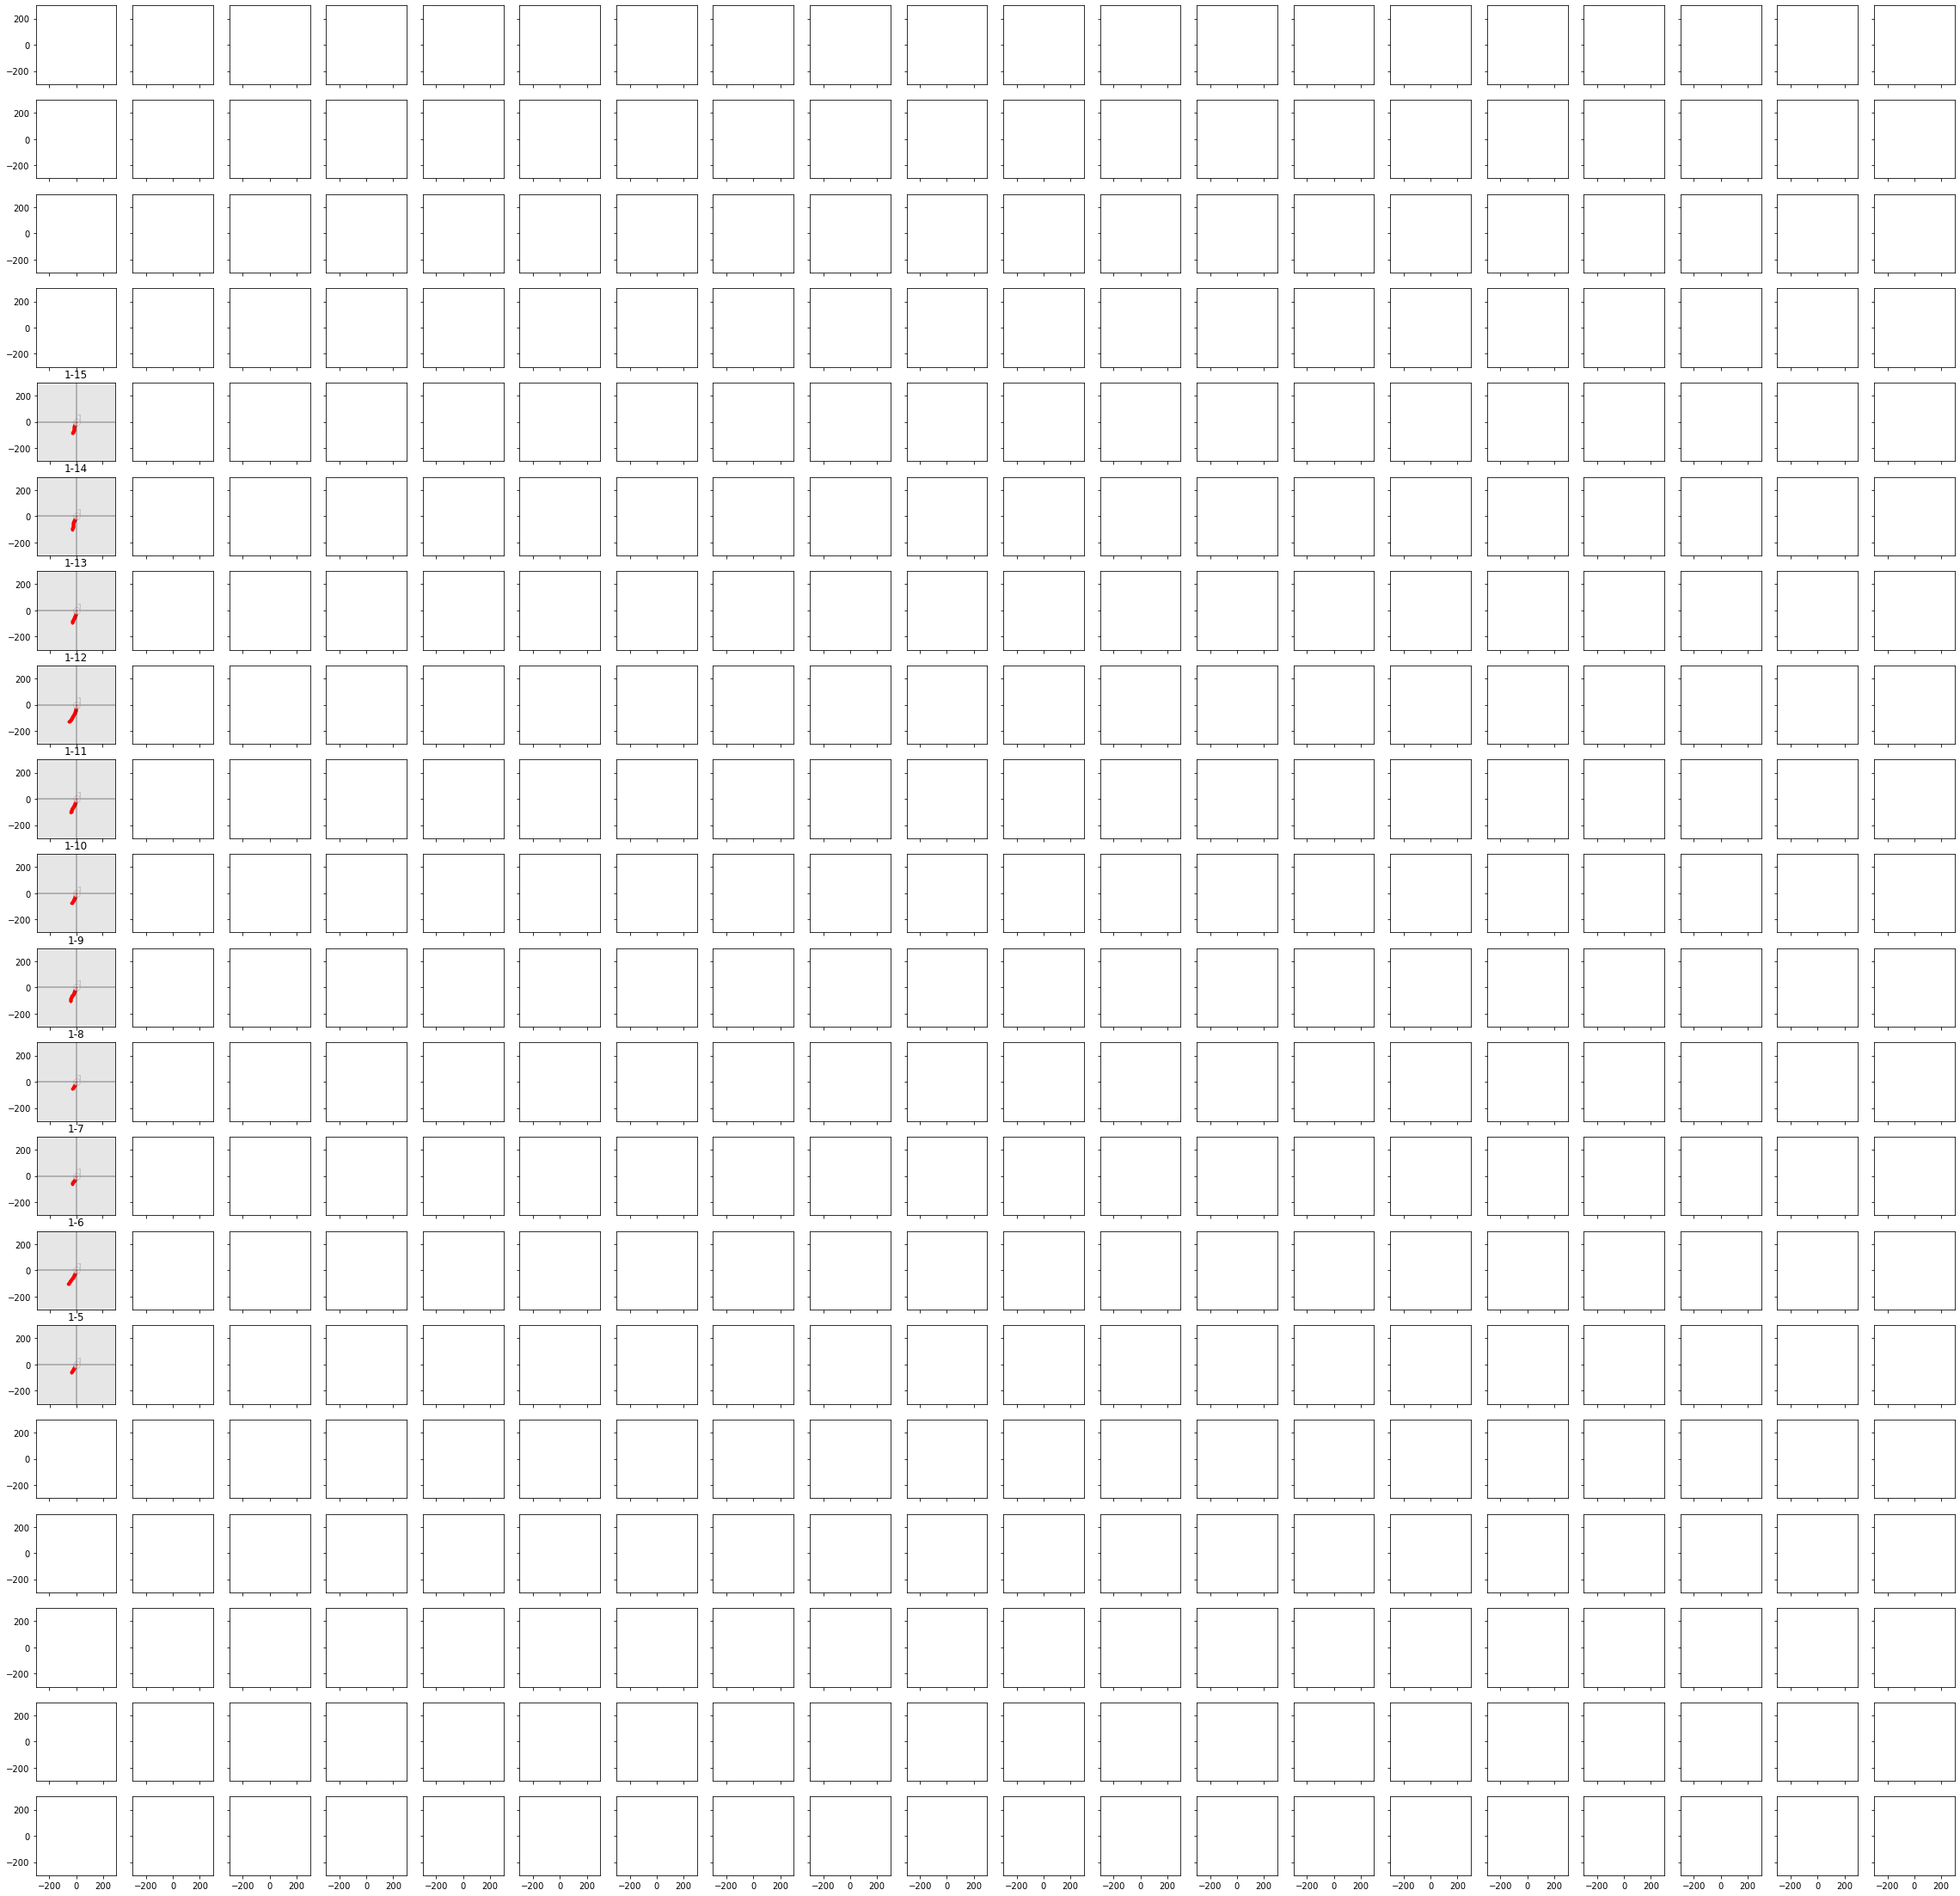

In [24]:

plot_grid_egtrials_organizedby("tsne", [35], 20)

In [ ]:
# 1) modify the below to take in current diectory structuer (old plots wrapper)    
# TODO: pull in all plots from plots()
plots(SDIR, overwrite=True, gmm_n=14, plotGrid=True)

## Compute and represent stroke by motor features

See old presentation on lines5

/data1/code/python/drawmonkey/notebooks_expts/analysis_modelexpt_multsession_strokmodel_100420.ipynb
- See figures at /data2/analyses/notebook/analysis_modelexpt_multsession/lines5/multday_Red_200921_to_201001/strokmodel/model_results/


see analysis --> line2



##### Current (new) approach

Do this since previous code was pretty bare. 

In [ ]:
# Preprocessing strokes (see above)
- (i.e,, drawmodel.sf import preprocessStroks)


In [ ]:
# Extract each stroke as StrokeClass
# -- first get all as Beh.
D.behclass_generate_alltrials()

In [ ]:
# -- Then pull out each Stroke
Beh = D.behclass_extract([0])[0]
Str = Beh.Strokes[0]

# preprocess stroke



In [ ]:
# Extract each stroke as datseg also (optional)

In [ ]:
# Extract stroke features


In [ ]:
# In StrokeClass, hold all moethods for features for a single stroke

see:
    - drawmodel.features.strokeFeatures (this was used in the lines5 stuff)
    - Lstrokeindex (based on motor model result).
    

In [ ]:
# Possible places holding code for getting stroke features:
- drawmodel.features - Yes
- efficiencycost 

In [ ]:
# In StrokeClass, hold methods for modeling strokes (motor model)
See drawmodel.motormodel

In [ ]:
# Get distrubtion of these features

In [ ]:
# make plots (see analysis_modelexpt_multsession_strokmodel_100420 for inspiration)